# Analysis of the Simpsons’ Society network

---

## Motivation

### What is your dataset?

We have one *raw dataset* (simpsons_ep-char.csv) where we have all the characters that appear in every episode, from that dataset we obtained the two definitive datasets  using techniques of *web scrapping* to the [*Simpsons Wiki*](https://simpsons.fandom.com/wiki/Simpsons_Wiki)

- ***characters.csv*** -> All the characters with general information such as name, genre, first_appearance, married, etc,
- ***episodes.csv*** ->  Every episode, with all the characters appearing, season, date of the episode, etc.

### Why did you choose this/these particular dataset(s)?
The Simpsons dataset excels for my research because it acts as a social mirror. It reflects societal norms and trends through humor, allowing to potentially identify biases and changing perspectives on inclusion (racism, homophobia) over its impressive three-decade run. Plus, the show's popularity makes the analysis engaging and attractive, sparking broader interest in social issues.

### What are the main objectives?

- Network Analysis of the Simpsons
- Community Detection in Springfield
- Influence Propagation in Springfield
- Evolution of the Network, including inclusion and ideology

### What was your goal for the end user’s experience?

- **Insightful Exploration**:  I want to empower the user to explore how The Simpsons reflects and reacts to societal changes, particularly regarding inclusion. This could involve uncovering trends in how the show portrays sensitive topics over time.

- **Engaging Discovery**:  By making the analysis interactive and potentially visualizing the data, I aim to create an engaging experience that fosters curiosity and deeper understanding. Comparing real-world events to shifts in the show's portrayal.

- **Accessible Understanding**:  The final insights shouldn't be shrouded in very technical language. I would strive to present the findings clearly and concisely, making them accessible to a broad audience, even those unfamiliar with data analysis.

---

# Dataset

## Characteristics of the final datasets

**Episodes**
- *episode_id* -> Id of the episode
- *character_id* -> Character appearing in the episode
- *season* -> Season of the episode
- *year* -> Year of the episode

**Characters**
- *character_id* -> Id of the character
- *name* -> Name of the character
- *male* -> If True the character is a male, otherwise is a female
- *lgbt* -> If True the character is part of the LGTB collective
- *married* -> If True the character is married, otherwise is not
- *smoker* -> If True the character is a regular smoker, otherwise is not
- *first_appearance* -> Id of the first episode where appeared the character
- *voice_actor* -> Name of the real actor who puts voice to the character
- *num_apperanaces* -> If True the character is a male, otherwise is a Female
- *text* -> Short and general description of the character 
- *tokens* -> Tf-Idf obtained of the *text*. Applying, tokenization, removing stopwords, and stemming


## Constructing the final datasets
Here will be provided all the code used to generate the dataset, even this, the *final datasets* are already provided so it is not necessary to execute this code again since its execution time is not immediate 


In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re 

BASE_URL = "https://simpsons.fandom.com/wiki/"

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
stemmer = PorterStemmer()


def tokenize_text(text):
    """
    Tokenizes the given text by performing the following steps:
    1. Converts the text to lowercase.
    2. Splits the text into individual words (tokens).
    3. Removes non-alphabetic tokens.
    4. Removes stop words (common words like 'the', 'is', etc.).
    5. Stems the remaining tokens using a stemming algorithm.
    6. Counts the frequency of each token.

    Args:
        text (str): The text to be tokenized.

    Returns:
        dict: A dictionary containing the tokenized words as keys and their frequencies as values.
    """
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]

    word_counts = Counter(tokens)
    return dict(word_counts)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lluis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lluis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def remove_tags(text):
    """
    Removes HTML tags and elements between square brackets from the given text.

    Args:
        text (str): The input text containing HTML tags and elements between square brackets.

    Returns:
        str: The text with HTML tags and elements between square brackets removed.
    """
    # Remove elements between < >
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove elements between [ ]
    text = re.sub(r'\[[^\]]+\]', '', text)
    text.replace("\n", " ")
    return text

In [6]:
def getCharacterInformation(soup, name):
    """
    Extracts information about a character from a BeautifulSoup object.

    Parameters:
    - soup (BeautifulSoup): The BeautifulSoup object containing the character information.
    - name (str): The name of the character.

    Returns:
    - character (dict): A dictionary containing the character information.
      - 'name' (str): The name of the character.
      - 'male' (bool or None): Indicates if the character is male. None if unknown.
      - 'lgbt' (bool): Indicates if the character is LGBT.
      - 'main' (bool): Indicates if the character is one of the main characters.
      - 'married' (bool): Indicates if the character is married.
      - 'smoker' (bool): Indicates if the character is a smoker.
      - 'first_appearance' (str or None): The first appearance of the character. None if unknown.
      - 'voice_actor' (str or None): The voice actor of the character. None if unknown.
    """
    character = {}
    try:
        categories = soup.find_all("ul", {"class":"categories"})[0].find_all("a")
    except:
        categories = []
    categories = [element.text for element in categories]
    character['name'] = name
    if 'Real World Articles' in categories:
        return None
    if 'Male characters' in categories:
        character['male'] = True
    elif 'Female characters' in categories:
        character['male'] = False
    else: 
        character['male'] = None

    if 'LGBT characters'  in categories or 'Lesbian characters' in categories or 'Gay characters' in categories or 'Nonbinary characters' in categories or 'Queer characters' in categories:
        character['lgbt'] = True
    else:
        character['lgbt'] = False

    if name in ['Homer Simpson', 'Marge Simpson', 'Bart Simpson', 'Lisa Simpson', 'Maggie Simpson']:
        character['main'] = True
    else:
        character['main'] = False

    if 'Married' in categories:
        character['married'] = True
    else:
        character['married'] = False

    if 'Smokers' in categories:
        character['smoker'] = True
    else:
        character['smoker'] = False

    character['first_appearance'] = None
    character['voice_actor'] = None
    for cat in categories:
        if 'first appearance' in cat.lower():
            character['first_appearance'] = cat.split(" ")[1]
        if 'characters voiced by' in cat.lower():
            character['voice_actor'] = cat.split(" ")[-1]
            
    return character

In [7]:
characters_raw = pd.read_csv("./data/simpsonsNodes.csv").rename(columns={"Id":"id", " char_name":"char_name"})
episodes_raw = pd.read_csv("./data/simpsons_ep-char.csv")
total_nulls = characters_raw.isnull().sum().sum() +episodes_raw.isnull().sum().sum()
print('Nulls:', total_nulls) 

print('Shape of characters:', characters_raw.shape)
print('Shape of episodes:', episodes_raw.shape)

Nulls: 0
Shape of characters: (651, 2)
Shape of episodes: (4903, 2)


Here, we do the web scrapping for the episodes information, obtaining characteristics like the year or the season.

In [8]:
total_episodes = 0
eps_for_season = {}
year_for_season = {}
i = 1

# We get how many episodes there is in each season, until we complete our full episodes dataset
while total_episodes < episodes_raw.episode_id.nunique():
    r = requests.get(BASE_URL+"Season_"+str(i))
    soup = BeautifulSoup(r.content, 'html.parser')
    content = soup.find_all("div", {"class":"pi-data-value pi-font"})
    episodes = int(content[1].text)
    year = int(content[0].text.split('-')[0].split(",")[-1].strip() )
    year_for_season[i] =year
    total_episodes += episodes
    eps_for_season[i] = episodes
    i+=1

In [9]:
episodes_raw['season'] = episodes_raw.episode_id.apply(lambda x: [k for k,v in eps_for_season.items() if x <= sum(list(eps_for_season.values())[:k])][0])
episodes_raw['year'] = episodes_raw.season.apply(lambda x: year_for_season[x])

There is some characters of our raw dataset that are found in the *wiki Simpsons* so manually we change some of the characters that could be interesting

In [10]:
characters_raw.char_name = characters_raw['char_name'].apply(lambda x: x.replace("'",""))

notFoundCharacters = {
    'Mayor \\"Diamond Joe\\" Quimby': 'Joe Quimby',
    'Dr. Julius Hibbert': 'Julius Hibbert',
    'Dr. Nick Riveria': 'Nick Riviera',
    'Atkins': 'State Comptroller Atkins',
    'Collette': 'Colette',
    'Beatrice \\"Bea\\" Simmons': 'Beatrice Simmons', 
    'Yes Guy': 'The Yes Guy',
    'Patches and Poor Violet': 'Poor Violet',
    'Toshiro the Apprentice Chef': 'Toshiro',
    'Old Barber': 'Jake the Barber',
    'Grampa Abraham Simpson':'Abe Simpson II',
    'Professor John Frink':'Jonathan Frink, Jr',
    'Gino': 'Gino Terwilliger',
    'Eddie Muntz': 'Eddie',
    'The Rich Texan': 'Richard Texan',
    'Ernst and Gunter': 'Gunter',
    'Superintendent Gary Chalmers': 'Gary Chalmers',
    'Principal Seymour Skinner':'Seymour Skinner',
    'Santa\\s Little Helper':'Santa%27s Little Helper',
    'Charles Montgomery \\"Monty\\" Burns':'Charles Montgomery Burns',
    'Boobarella':'Booberella',
    'Blue Haired Lawyer':'Blue-Haired Lawyer',
    'Chief Clancy Wiggum':'Clancy Wiggum',
    'Birchibald \\"Birch\\" T. Barlow':'Birch Barlow',
    'Samantha Stanky':'Samantha Stankey',
    'Rex' : 'Rex Banner', 
    'The Gremlin': 'Gremlin (character)',
    'Dean Peterson': 'Bobby Peterson',
    'Molloy the Cat Burglar':'Molloy',
    'Freddie Quimby':'Freddy Quimby',
    'The Fortuneteller':'Fortune Teller (Lisa\'s Wedding)',
    'Dr. Sally Wexler': 'Professor Wexler',
    'Seymour Skinnner': 'Seymour Skinner',
    'Coach Lugash': 'Lugash',
    'Starla': 'Starla Starbeam',
    'Dr. Joan Bushwell': 'Joan Bushwell',
    'Frank \\"Grimey\\" Grimes' : 'Frank Grimes',
    'Singing Hobo': 'The Singing Hobo',
    'The Gypsy': 'Gypsy',
    'Emil':'Emile (The Two Mrs. Nahasapeemapetilons)',
    'Greg':'Cousin Greg',
    'Sherry Bobbins':'Shary Bobbins',
    'Dr. Velimorovic': 'Dr. Velimirovic',
    'Michael Finn':'Michael Finn',
    'Don Francis Castellaneta':'Don Castellaneta',
    'Mrs. Bellamy':'Myrna Bellamy',
    'The Real Principal Seymour Skinner':'Seymour Skinner (real)',
    'Apu\\s Mother':'Mrs. Nahasapeemapetilon',
    'The The Army Colonel':'Army Colonel',
    '\"Weird Al\" Yankovic':'Weird Al Yankovic',
    'Virgil': 'Virgil Simpson',
}

characters_raw.char_name = characters_raw.char_name.apply(lambda x: notFoundCharacters[x] if x in notFoundCharacters.keys() else x)

Here, is done the webscrapping obtaining all the information of the characters. We use *joblib* to parallelize this task and make it more efficient.

In [11]:
from joblib import Parallel, delayed
import requests
import time
from bs4 import BeautifulSoup

def process_character(i):
    print(i)
    r = requests.get(BASE_URL+i.replace(" ", "_"))
    if r.status_code >= 404:
        return (i, None)
    else:
        
        soup = BeautifulSoup(r.content, 'html.parser')
        characterStats = getCharacterInformation(soup, name = i)
        if characterStats != None:
            print(i)
            print(characters_raw[characters_raw.char_name == i].id.values)
            print(characters_raw[characters_raw.char_name == i].id.values[0])
            characterStats['character_id'] = characters_raw[characters_raw.char_name == i].id.values[0]
            
            if characterStats['first_appearance'] == None:
                lista = soup.find_all("div", {"class":"pi-data-value pi-font"})
                try:
                    chapter = [i.find("a") for i in lista if i.find("a") is not None][-2].text
                    r = requests.get(BASE_URL+chapter.replace(" ", "_"))
                    soup2 = BeautifulSoup(r.content, 'html.parser')
                    try:
                        num_episode = int(soup2.find_all("div", {"class":"pi-data-value pi-font"})[0].text)
                    except:
                        num_episode = 1
                    season = episodes_raw[episodes_raw.episode_id == num_episode]['season'].values[0]
                    characterStats['first_appearance'] = season
                except:
                    return (i, None)
            try:
                p =soup.find_all("p")
                text = p[min(len(p),1):max(6,len(p))]
                result_text = ' '.join([str(x) for x in text])
                result_text = remove_tags(result_text)
                characterStats['text'] = result_text
            except:
                characterStats['text'] = None
            return (i, characterStats)
        else:
            return (i, None)

start = time.time()

results = Parallel(n_jobs=-1)(delayed(process_character)(i) for i in characters_raw['char_name'].values)

notFoundCharacters = [i for i, result in results if result is None]
foundCharacters = [result for i, result in results if result is not None]

print('Time to get all characters:', time.time()-start)

Time to get all characters: 72.62489151954651


In [123]:
def chekSmoker(string):
    """
    Check if the given string contains the word 'smoker'.

    Parameters:
    string (str): The string to be checked.

    Returns:
    bool: True if the string contains 'smoker', False otherwise.
    """
    if "smoker" in string:
        return True
    else:
        return False

def checkLgbt(x):
    """
    Checks if a given input contains multiple LGBT-related terms.

    Args:
        x (dict): A dictionary containing terms and their frequencies.

    Returns:
        bool: True if the input contains more than one LGBT-related term, False otherwise.
    """
    list_of_checing = ['gay', 'bisexual', 'lesbian', 'lgbt', 'queer', 'nonbinary']
    sum = 0
    for i in list_of_checing:
        if i in x:
            sum += x[i]
    return sum >= 1

In [14]:
characters = pd.DataFrame(foundCharacters)
characters['num_appereances'] = characters['character_id'].apply(lambda x: episodes_raw[episodes_raw['character_id'] == x].shape[0])

# Drop those characters with repited id or that have been founded but not apear in the show
characters = characters[characters['num_appereances'] != 0]
characters = characters.drop_duplicates(subset=['character_id'])
characters.reset_index(drop=True, inplace=True)

episodes_df = episodes_raw[episodes_raw.character_id.isin(characters.character_id.values)]

Here we get the properties from the tf-idf, and we classify a character depending on the information obtained with the dictionary of tokens
- We convert the character to a smoker if the word smoker appears in the text.
- We convert the character to LGBT collective if some of the related LGBT words are included in the text more than 2 times.

In [124]:
# Convert text to tokens
characters['tokens'] = characters['text'].apply(tokenize_text)

#SMokers properties
characters['smoker2'] = characters['tokens'].apply(chekSmoker)
characters['smoker'] = characters['smoker'] | characters['smoker2']

#LGBT properties
characters['lgbt2'] = characters['tokens'].apply(checkLgbt)
characters['lgbt'] = characters['lgbt'] | characters['lgbt2']


characters.loc[characters['name'] == 'Marge Simpson','smoker'] = False
characters.drop(['smoker2','lgbt2'], inplace = True, axis = 1)

#Filling NAN
characters['lgbt'] = characters['lgbt'].fillna(False)
characters['text'] = characters['text'].fillna('')

In [30]:
# characters['lgbt'] = characters2['lgbt']
# characters['smoker'] = characters2['smoker']

In [129]:
# # Save the data
characters.to_csv("./data/characters.csv", index=False)
episodes_df.to_csv("./data/episodes.csv", index=False)

---

# Basic stats

The analysis is being started with the definitives dataset, which was obtained using *web scrapping*. As we commented before, we will have two datasets.

- characters
- episodes

In [32]:
import pandas as pd
characters = pd.read_csv('./data/characters.csv')
episodes = pd.read_csv('./data/episodes.csv')

In [33]:
characters.head()

,name,male,lgbt,main,married,smoker,first_appearance,voice_actor,character_id,text,num_appereances,tokens,lgbt2
0,Homer Simpson,True,False,True,True,False,1,Cartwright,1,"He is a crude, ignorant, and slobbish individu...",519,"{'crude': 2, 'ignor': 8, 'slobbish': 1, 'indiv...",False
1,Marge Simpson,False,False,True,True,False,1,Kavner,2,"Marjorie Jacqueline ""Marge"" Simpson (née Bouvi...",451,"{'marjori': 1, 'jacquelin': 2, 'marg': 136, 's...",False
2,Bart Simpson,True,False,True,False,False,1,Castellaneta,3,"Bartholomew JoJo ""Bart"" Simpson (born April 1 ...",462,"{'bartholomew': 1, 'jojo': 1, 'bart': 361, 'si...",False
3,Lisa Simpson,False,False,True,False,True,1,Smith,4,Lisa Flanders Moaning LisaQueen HelveticaNancy...,421,"{'lisa': 231, 'flander': 4, 'moan': 2, 'lisaqu...",False
4,Maggie Simpson,False,False,True,False,False,1,Castellaneta,5,"For the rest of her relatives, refer to the Th...",112,"{'rest': 4, 'rel': 1, 'refer': 8, 'simpson': 2...",False


In [34]:
episodes.head()

,episode_id,character_id,season,year
0,1,1,1,1990
1,1,2,1,1990
2,1,3,1,1990
3,1,4,1,1990
4,1,32,1,1990


In [35]:
import sys
print('TOTAL NUMBER OF CHARACTERS:', characters.character_id.nunique())
print('TOTAL NUMBER OF EPISODES:', episodes.episode_id.nunique())
print('TOTAL NUMBER OF SEASONS:', episodes.season.nunique())
characters_size = sys.getsizeof(characters) / (1024 * 1024)  # Size in megabytes
episodes_df_size = sys.getsizeof(episodes) / (1024 * 1024)  # Size in megabytes
print('')
print("Size of characters:", characters_size, "MB")
print("Size of episodes_df:", episodes_df_size, "MB")


TOTAL NUMBER OF CHARACTERS: 362
TOTAL NUMBER OF EPISODES: 546
TOTAL NUMBER OF SEASONS: 25

Size of characters: 3.408627510070801 MB
Size of episodes_df: 0.1406402587890625 MB


We see that the majority amount of characters appeared in the season 1 and after in the season 2. From season 3, except 15,21 and 22 there is a very similar amount of new characters every season

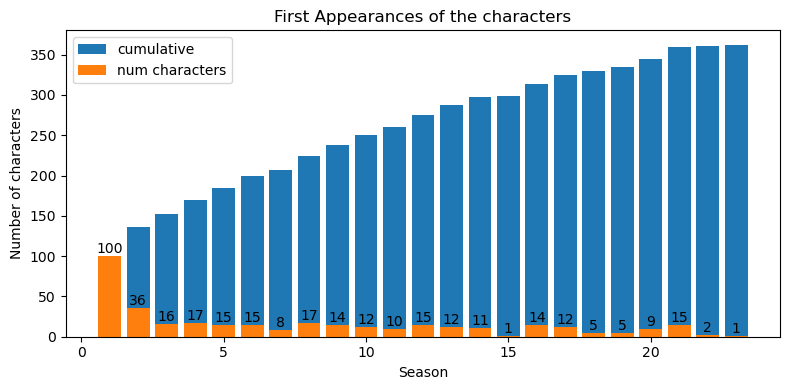

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
season_counts = characters['first_appearance'].value_counts().sort_index()
season_counts_cumsum = season_counts.cumsum()

plt.bar(season_counts_cumsum.index, season_counts_cumsum.values, label = 'cumulative')
plt.bar(season_counts.index, season_counts.values, label = 'num characters')
for i, v in enumerate(season_counts):
    plt.annotate(str(v), xy=(i+1, v), ha='center', va='bottom')
plt.xlabel('Season')
plt.legend()
plt.ylabel('Number of characters')
plt.title('First Appearances of the characters')
plt.tight_layout()
plt.show()


We can see that the main characters have a really big importance, what makes sense, we will take that in mind later.

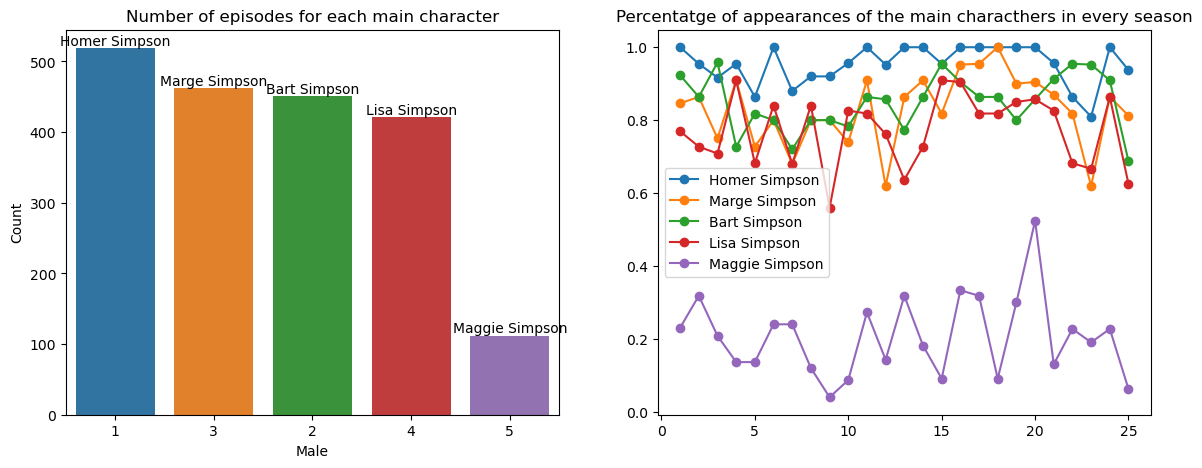

In [37]:
import seaborn as sns
episodes_main = episodes[episodes.character_id.isin(characters[characters.main]['character_id'].values)]

episodes_main.character_id.value_counts()
fig, ax = plt.subplots(1,2,figsize=(14, 5))


# Use seaborn's countplot to create the plot
sns.countplot(data=episodes_main, x='character_id', order=episodes_main.character_id.value_counts().index, ax=ax[0])
for i, v in enumerate(episodes_main.character_id.value_counts()):
    ax[0].text(i, v, str(characters[characters.character_id == i+1].name.values[0]), ha='center', va='bottom')
# Adding title and labels
ax[0].set_title('Number of episodes for each main character')
ax[0].set_xlabel('Male')
ax[0].set_ylabel('Count')

eps_season = episodes_main.drop_duplicates(subset='episode_id').season.value_counts()

for i in episodes_main.character_id.unique():   
    eps_season_char = episodes_main[episodes_main.character_id == i].season.value_counts()
    percentatge_eps_season = eps_season_char / eps_season
    ax[1].plot(episodes_main.season.unique(),percentatge_eps_season, label = characters[characters.character_id == i].name.values[0], marker='o')

ax[1].set_title('Percentatge of appearances of the main characthers in every season')
ax[1].legend()
plt.show()

In the following histograms we can see that there is a really big amount of characters that only appear once, and there is not that many that appear frequently

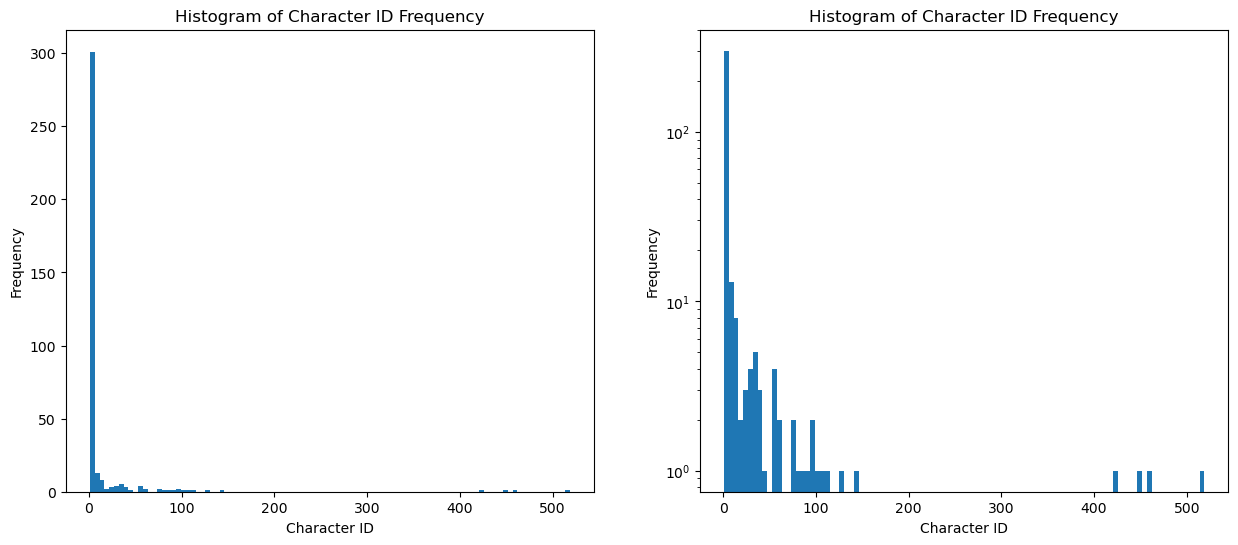

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))

# Create a histogram
ax1.hist(characters['num_appereances'], bins=100)  # Adjust the number of bins as needed

# Set labels and title
ax1.set_xlabel('Character ID')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Character ID Frequency')

ax2.hist(characters['num_appereances'], bins=100)  # Adjust the number of bins as needed

# Set labels and title
ax2.set_xlabel('Character ID')
ax2.set_ylabel('Frequency')
ax2.set_yscale('log')
ax2.set_title('Histogram of Character ID Frequency')

# Show the histogram
plt.show()


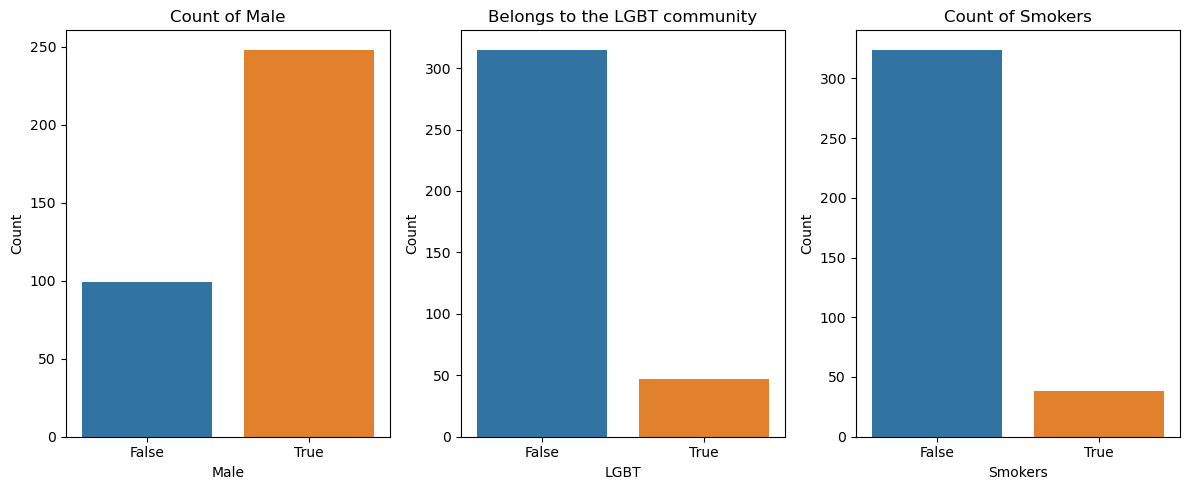

In [126]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 5))

# Use seaborn's countplot to create the plot
sns.countplot(data=characters, x='male', ax=ax1)
sns.countplot(data=characters, x='lgbt', ax=ax2)
sns.countplot(data=characters, x='smoker', ax=ax3)
# Adding title and labels
ax1.set_title('Count of Male')
ax1.set_xlabel('Male')
ax1.set_ylabel('Count')

ax2.set_title('Belongs to the LGBT community')
ax2.set_xlabel('LGBT')
ax2.set_ylabel('Count')

ax3.set_title('Count of Smokers')
ax3.set_xlabel('Smokers')
ax3.set_ylabel('Count')


# Show the plot
plt.tight_layout()
plt.show()


---


## Tools

Here we have a list of the main tools used for this project

- **pandas** -> For all the data analysis
- **networkx** -> For the creation and modification of all the graphs.
- **netwulf** -> For the representation and visualization of the graphs
- **matplotlib** -> For all the plots

## Theory and  Analysis

When representing the networks we are going to differentiate the characters to facilitate visualization. The main characters will be represented in a light yellow, the characters that only appear once in the series in blue, and the others in a darker yellow.

### Evolution of the network throw the seasons

In [40]:
import json

def saveConfig(confg, path = 'data/season_net_config.json'):
    """
    Save the given configuration dictionary as a JSON file at the specified path.

    Parameters:
    confg (dict): The configuration dictionary to be saved.
    path (str): The path where the JSON file will be saved.

    Returns:
    None
    """
    json_string = json.dumps(confg)
    with open(path, 'w') as file:
        file.write(json_string)


def loadConfig(path = 'data/season_net_config.json',):
    """
    Load the configuration from a JSON file.

    Parameters:
    - path (str): The path to the JSON file. Default is 'data/season_net_config.json'.

    Returns:
    - config (dict): The loaded configuration as a dictionary, or None if the file cannot be loaded.
    """
    try:
        with open(path, 'r') as file:
            config =  json.loads(file.read())
    except:
        config  = None
    return config


In [41]:
from itertools import combinations

def createCombinationsSeason(df, season):
    """
    Create combinations of character pairs from a given dataframe for a specific season.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing the episodes data.
    - season (int): The season number up to which the combinations should be created.

    Returns:
    - character_pairs (pandas.DataFrame): The dataframe containing the character pairs and their occurrence count.
    """

    episodes_df_season = df[df.season <= season]
    episode_combinations = episodes_df_season.groupby('episode_id')['character_id'].apply(lambda x: list(combinations(x, 2)))

    # Flatten the list of combinations
    episode_combinations = [item for sublist in episode_combinations for item in sublist]

    # Count occurrences of each combination
    character_pairs = pd.DataFrame(episode_combinations, columns=['character1', 'character2'])
    character_pairs['weight'] = 1
    character_pairs = character_pairs.groupby(['character1', 'character2']).count().reset_index()

    return character_pairs

In [42]:
import networkx as nx
import netwulf as nw

def createNetwrok(df, smoker_network=False):
    """
    Create a network graph from a pandas DataFrame.

    Parameters:
    - df (pandas DataFrame): The DataFrame containing the edge list of the network.
    - smoker_network (bool): Flag indicating whether to create a network with only smokers.

    Returns:
    - G (networkx.Graph): The created network graph.
    """

    G = nx.from_pandas_edgelist(df, 'character1', 'character2', 'weight')

    one_appearance = characters[characters.num_appereances == 1].character_id.values
    main_characters = characters[characters.main].character_id.values
    smokers = characters[characters.smoker].character_id.values

    if smoker_network:
        for k, v in G.nodes(data=True):
            if k in smokers:
                v['group'] = 'red'
            else:
                v['group'] = '#ccd540'
    else:
        for k, v in G.nodes(data=True):
            if k in one_appearance:
                v['group'] = 'blue'
            elif k in main_characters:
                v['group'] = '#f1ff00'
            else:
                v['group'] = '#ccd540'

    return G

Here, we can see the Network with the main characters in the first season.

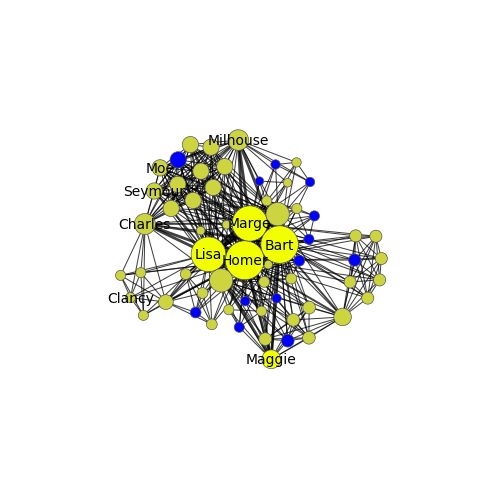

In [43]:
G_df = createCombinationsSeason(episodes,1)
G = createNetwrok(G_df)

style_net, net_config = nw.visualize(G, config = loadConfig())
fig, ax = nw.draw_netwulf(style_net)
for i, row in characters.sort_values('num_appereances', ascending=False).head(10).iterrows():
    nw.tools.add_node_label(ax, style_net, row['character_id'], label=row['name'].split(' ')[0])

saveConfig(net_config)
plt.show()

Here we can see the Network with the main characters in the last season.

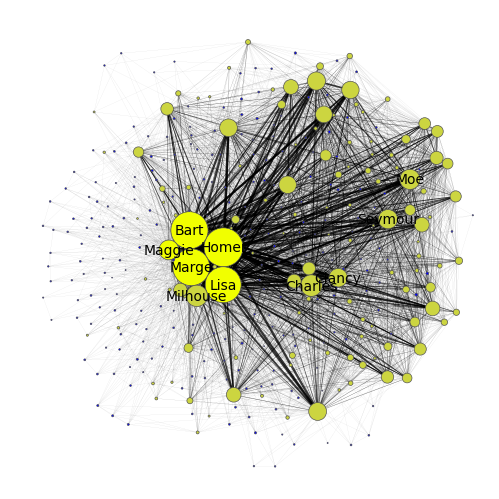

In [46]:
G_df = createCombinationsSeason(episodes,episodes.season.max())
G = createNetwrok(G_df)

style_net, net_config = nw.visualize(G, config = loadConfig())
fig, ax = nw.draw_netwulf(style_net)
for i, row in characters.sort_values('num_appereances', ascending=False).head(10).iterrows():
    nw.tools.add_node_label(ax, style_net, row['character_id'], label=row['name'].split(' ')[0])
plt.show()

Let's see the evolution of the network over the seasons. Will be represented on the network every three seasons.

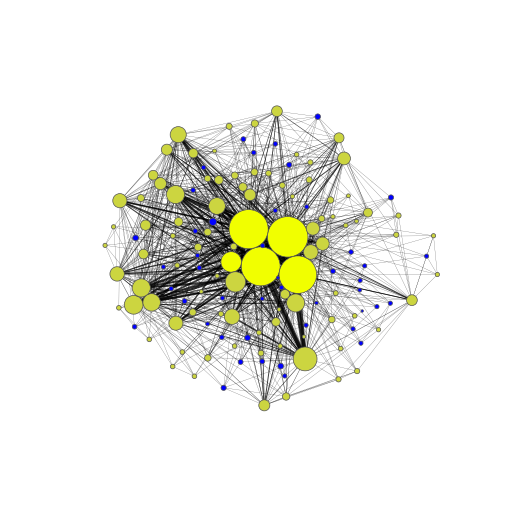

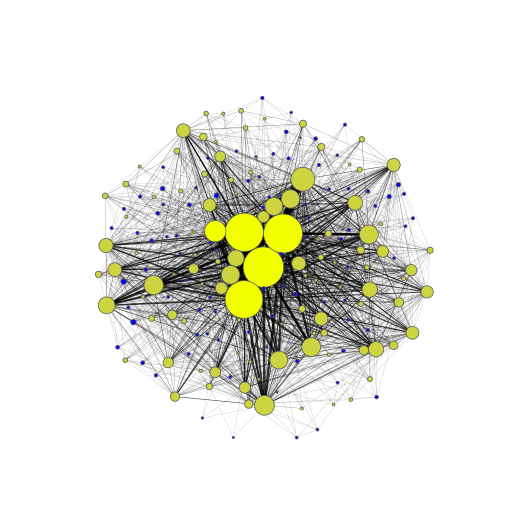

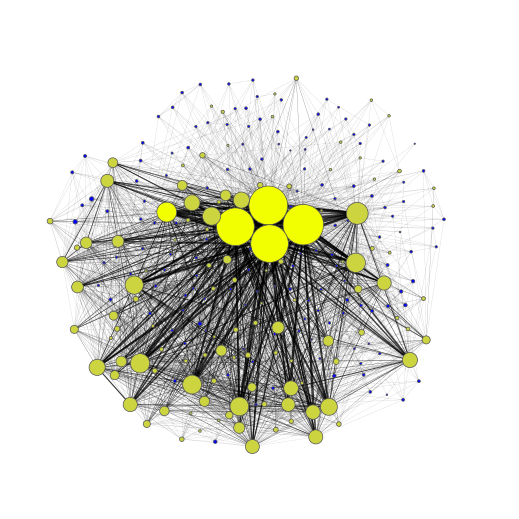

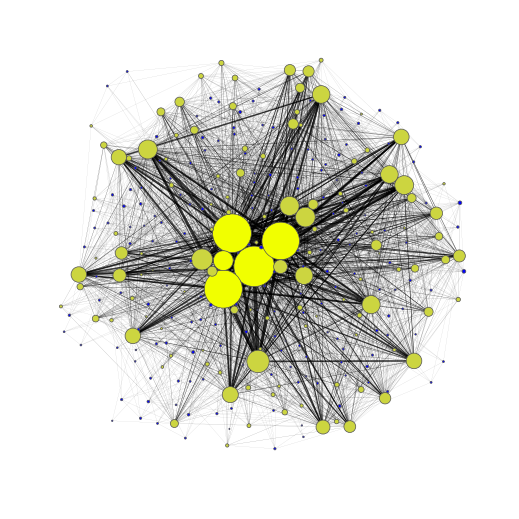

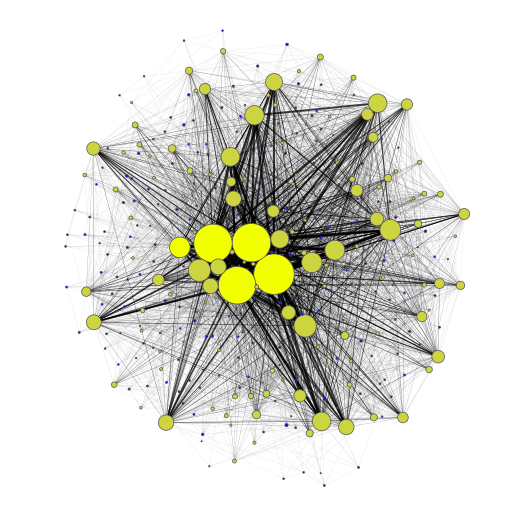

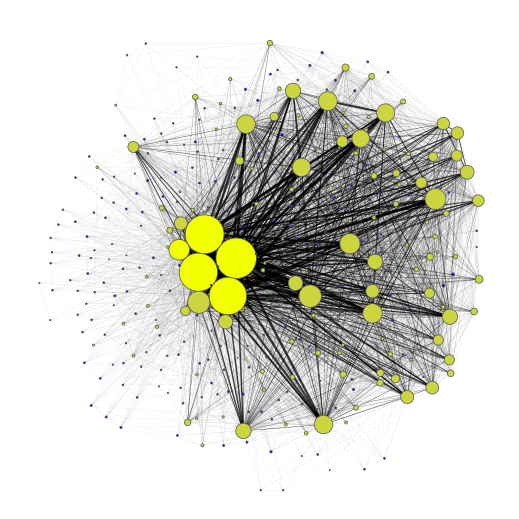

In [48]:
seasons_networks = {}
net_config_seasons = loadConfig()
net_props = pd.DataFrame(columns=['season', 'num_nodes', 'num_edges', 'avg_degree', 'density', 'avg_clustering', 'transitivity', 'avg_shortest_path', 'diameter'])

for i in range(1, episodes.season.max()):
    G_df = createCombinationsSeason(episodes, i)
    G = createNetwrok(G_df)
    num_nodes, num_edges = G.number_of_nodes(), G.number_of_edges()
    avg_degree = sum(dict(G.degree()).values()) / num_nodes
    density = nx.density(G)
    avg_clustering = nx.average_clustering(G)
    transitivity = nx.transitivity(G)
    avg_shortest_path = nx.average_shortest_path_length(G)
    diameter = nx.diameter(G)

    net_props.loc[i] = [i, num_nodes, num_edges, avg_degree, density, avg_clustering, transitivity, avg_shortest_path, diameter]
    if i % 4 == 0:
        style_net, net_config = nw.visualize(G, config = net_config_seasons)
        seasons_networks[i] = style_net
        fig,ax = nw.draw_netwulf(style_net, figsize=5)
    



The network undergoes expansion with each passing season, as evidenced by the escalating count of nodes and edges. This growth is mirrored in the increasing average degree, reflecting heightened character interactions as the number of episodes rises. Conversely, metrics such as average clustering, average shortest path, and diameter demonstrate a remarkable degree of constancy. This stability underscores the network's ability to maintain its fundamental properties despite substantial expansion over successive seasons.

In [50]:
net_props.to_csv('data/season_properties.csv', index=False)
net_props

,season,num_nodes,num_edges,avg_degree,density,avg_clustering,transitivity,avg_shortest_path,diameter
1,1.0,62.0,441.0,14.225806,0.233210,0.908386,0.502830,1.766790,2.0
2,2.0,99.0,714.0,14.424242,0.147186,0.885498,0.340225,1.855700,3.0
3,3.0,116.0,893.0,15.396552,0.133883,0.862592,0.306494,1.869415,3.0
4,4.0,138.0,1183.0,17.144928,0.125145,0.860422,0.313298,1.877711,3.0
5,5.0,153.0,1401.0,18.313725,0.120485,0.858168,0.319517,1.887169,3.0
6,6.0,166.0,1583.0,19.072289,0.115590,0.861894,0.323315,1.890909,3.0
7,7.0,175.0,1769.0,20.217143,0.116190,0.866457,0.340498,1.889130,3.0
8,8.0,193.0,2009.0,20.818653,0.108430,0.872179,0.334553,1.895617,3.0
9,9.0,210.0,2166.0,20.628571,0.098701,0.873745,0.313219,1.905901,3.0
10,10.0,226.0,2327.0,20.592920,0.091524,0.878310,0.303530,1.913235,3.0


### Smokers Communities Clustering

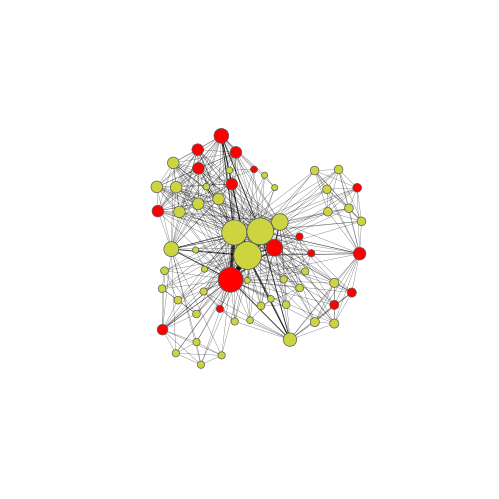

In [51]:
G_df = createCombinationsSeason(episodes,1)
G_smok_1 = createNetwrok(G_df, smoker_network=True)

style_net, net_config = nw.visualize(G_smok_1, config = loadConfig('data/net_config_smokers.json'))
fig, ax = nw.draw_netwulf(style_net)
plt.show()

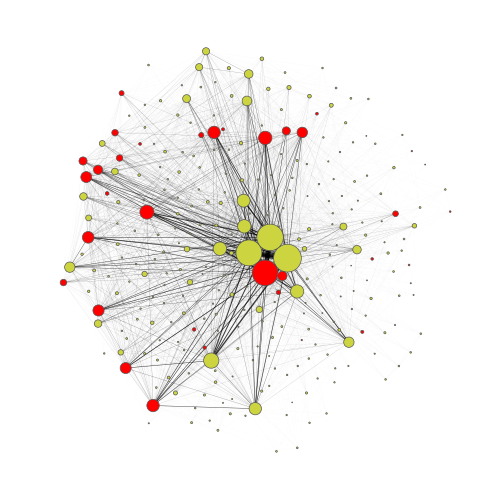

In [29]:
G_df = createCombinationsSeason(episodes,15)
G_smok_12 = createNetwrok(G_df, smoker_network=True)

style_net, net_config = nw.visualize(G_smok_12, config = loadConfig('data/net_config_smokers.json'))
fig, ax = nw.draw_netwulf(style_net)
plt.show()

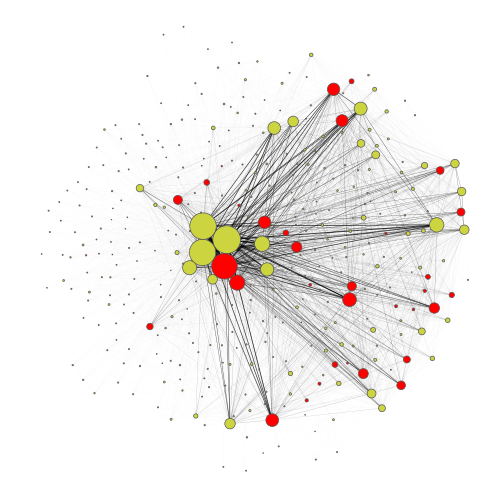

In [52]:
G_df = createCombinationsSeason(episodes,episodes.season.max())
G_smok_max = createNetwrok(G_df, smoker_network=True)

style_net, net_config = nw.visualize(G_smok_max, config = loadConfig('data/net_config_smokers.json'))
fig, ax = nw.draw_netwulf(style_net)
plt.show()

In [53]:
def maxEdges(n):
    """
    Calculates the maximum number of edges in a complete graph with 'n' nodes.
    Parameters:
    n (int): The number of nodes in the graph.
    Returns:
    int: The maximum number of edges in the complete graph.
    """
    return (n*(n-1))/2
def maxEdgesBipartite(n1, n2):
    """
    Calculates the maximum number of edges in a bipartite graph.
    Parameters:
    n1 (int): Number of nodes in the first partition.
    n2 (int): Number of nodes in the second partition.
    Returns:
    int: The maximum number of edges in the bipartite graph.
    """
    return n1 * n2

In [54]:
def getClustersProperties(G):
    """
    Get the properties of the clusters in the given graph.

    Parameters:
    - G (networkx.Graph): The graph for which the clusters properties should be calculated.

    Returns:
    - Print all the porperties of the smokers clusters
    """
    smokers_nodes = [node for node, attributes in G.nodes(data=True) if attributes['group'] == 'red']
    not_smokers_nodes = [node for node, attributes in G.nodes(data=True) if attributes['group'] != 'red']
    num_smokers_nodes, num_not_smokers_nodes = len(smokers_nodes), len(not_smokers_nodes)

    print("Number of  smokers:", num_smokers_nodes)
    print("Number of not smokers:", num_not_smokers_nodes,'\n')


    possible_smoker_edges = maxEdges(num_smokers_nodes)
    possible_not_smoker_edges = maxEdges(num_not_smokers_nodes)
    possible_bipartite = maxEdgesBipartite(num_smokers_nodes, num_not_smokers_nodes)

    smokers_edges, not_smokers_edges, bipartite_edges = [], [], []

    for node1,node2,dict in G.edges(data = True):
        # node1, node2 = edge
        if node1 in not_smokers_nodes and node2 in not_smokers_nodes:
            not_smokers_edges.append(dict['weight'])
        elif (node1 in smokers_nodes and node2 in not_smokers_nodes) or (node1 in not_smokers_nodes and node2 in smokers_nodes):
            bipartite_edges.append(dict['weight'])
        elif node1 in smokers_nodes and node2 in smokers_nodes:
            smokers_edges.append(dict['weight'])

    print('Possible edges between smokers: {} Actual edges between smokers: {}. ({}%)'.format(possible_smoker_edges ,len(smokers_edges), round((len(smokers_edges)/possible_smoker_edges)*100,2) ))
    print('Average weight between smokers', sum(smokers_edges)/ len(smokers_edges))
    print('Possible edges between not smokers: {} Actual edges between not smokers: {}. ({}%)'.format(possible_not_smoker_edges ,len(not_smokers_edges), round((len(not_smokers_edges)/possible_not_smoker_edges)*100,2)))
    print('Average weight between not smokers',sum(not_smokers_edges)/ len(not_smokers_edges))
    print('Possible edges between smokers and not smokers: {} Actual edges between smokers and not smokers: {}. ({}%).'.format(possible_bipartite ,len(bipartite_edges), round((len(bipartite_edges)/possible_bipartite)*100,2)))
    print('Average weight betwee smokers and not smokers',sum(bipartite_edges)/ len(bipartite_edges))
    print('')
   

In [55]:
getClustersProperties(G_smok_1)
print('-'*25)
# getClustersProperties(G_smok_12)
# print('-'*25)
getClustersProperties(G_smok_max)

Number of  smokers: 17
Number of not smokers: 45 

Possible edges between smokers: 136.0 Actual edges between smokers: 44. (32.35%)
Average weight between smokers 1.0681818181818181
Possible edges between not smokers: 990.0 Actual edges between not smokers: 204. (20.61%)
Average weight between not smokers 1.2205882352941178
Possible edges between smokers and not smokers: 765 Actual edges between smokers and not smokers: 193. (25.23%).
Average weight betwee smokers and not smokers 1.238341968911917

-------------------------
Number of  smokers: 38
Number of not smokers: 324 

Possible edges between smokers: 703.0 Actual edges between smokers: 324. (46.09%)
Average weight between smokers 6.848765432098766
Possible edges between not smokers: 52326.0 Actual edges between not smokers: 2154. (4.12%)
Average weight between not smokers 3.8783658310120708
Possible edges between smokers and not smokers: 12312 Actual edges between smokers and not smokers: 1749. (14.21%).
Average weight betwee smo

### LBGT inclusion 

Analyzing the data on the first appearances and total appearances of *LGBT characters* across seasons, several patterns emerge. Initially, it's notable that there are instances of first appearances of *LGBT characters* both in later seasons and in the inaugural season. However, this needs to be contextualized by considering the influx of new characters in the first season. 

Upon closer examination, of the second plot, it becomes evident that there is a visual uptick in the frequency of total appearances of LGBT characters in later seasons compared to earlier ones. There appears to be a **discernible trend** towards an increased presence of *LGBT characters* in later seasons, suggesting a potential **awareness of the scriptwriters**.

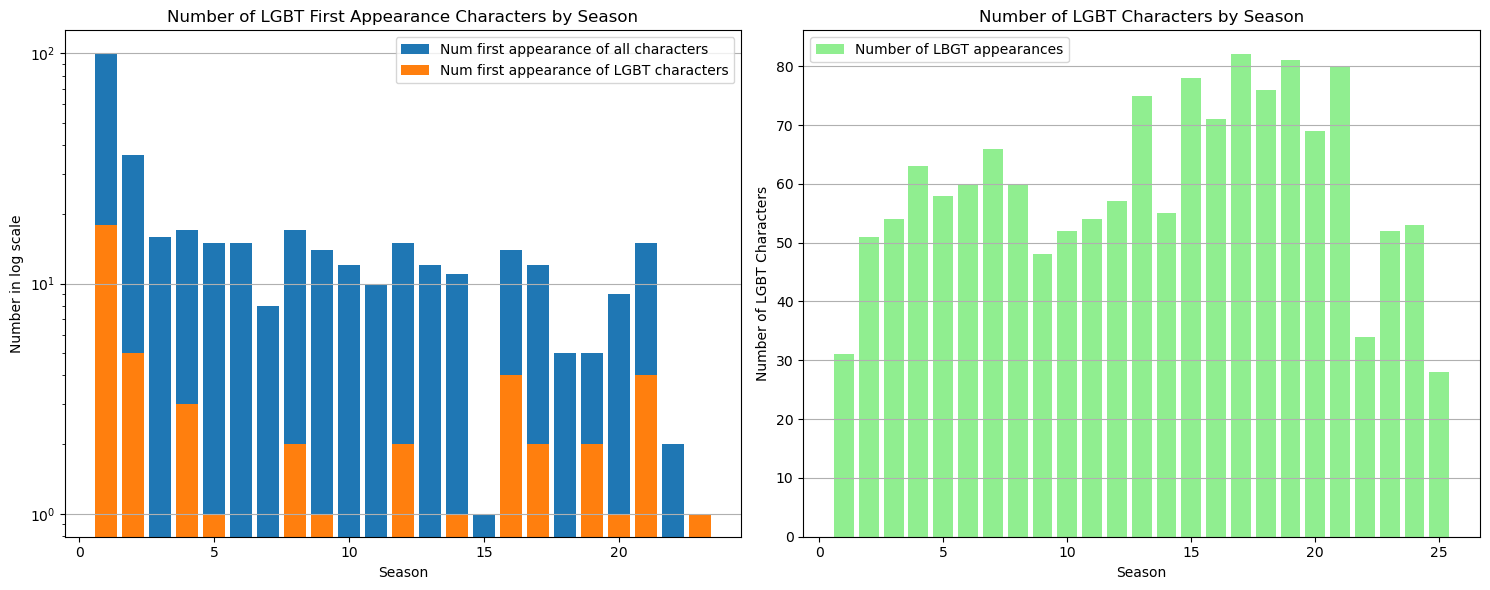

In [125]:
lgbt_counts = characters[characters['lgbt'] == True].groupby('first_appearance').size()
first_appearances = characters.groupby('first_appearance').size()

printer = episodes[episodes.character_id.isin(characters[characters.lgbt].character_id.values)].season.value_counts()
all_appearances = episodes.season.value_counts()

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.bar(first_appearances.index, first_appearances.values, label= 'Num first appearance of all characters')
ax1.bar(lgbt_counts.index, lgbt_counts.values, label= 'Num first appearance of LGBT characters')
ax1.set_xlabel('Season')
ax1.legend()
ax1.set_yscale('log')  
ax1.set_ylabel('Number in log scale')
ax1.set_title('Number of LGBT First Appearance Characters by Season')
ax1.grid(True, axis = 'y')

## Second plot
ax2.bar(printer.index, printer.values, label= 'Number of LBGT appearances', color = 'lightgreen')

ax2.set_xlabel('Season')
ax2.legend()
ax2.set_ylabel('Number of LGBT Characters')
ax2.set_title('Number of LGBT Characters by Season')
ax2.grid(True, axis = 'y')  

plt.tight_layout()
plt.show()

---

## Conclusions

### What went well?

The analysis of our experiments has yielded insightful results

The Networks generated exhibit commendable quality, reflecting the robustness of our methods. Moreover, the evolution of the Network unfolds with remarkable logic, demonstrating a coherent progression in its growth over time. What is more, we could also verify the big influence of the main characters by seeing the large amount of relationships they have.

From the Cluster experiment, we can extract very good conclusions and corroborate our first hypothesis, it is seen that the smoker's characters tend to be more related to them. It has been shown how smokers are more connected with other smokers, in the number of smokers connected against the number of no-smokers connected and also in times connected with every smoker against a no-smoker character.

While the findings of the LGBT inclusion experiment could lack the clarity to confirm the hypothesis one hundred percent, even this, it is slightly shown that there exists a trend of more inclusion in the last seasons of the show. This could be for better acceptance of society and awareness of scriptwriters.

### What is still missing or could be improved?

First of all, it is worth mentioning that being the only one working on the project has been a time limitation at some points. Even this, the project's reliance solely on remote work modalities may have occasionally hindered collaboration and expedited progress.

Additionally, expanding the scope of analysis to encompass more seasons and more characters emerges as the main improvement topic. This approach promises to enrich our understanding of the subject and check if all our conclusions scale over time. This way, we could attain clearer and more robust conclusions that capture the full complexity.

Furthermore, enhancing the precision and accuracy of web scraping methodologies represents a critical area for improvement. While acknowledging the potential time investment required, the benefits of refined data collection techniques cannot be overstated. Improving the quality of our data inputs not only fortifies the reliability of our conclusions but also enables more nuanced analyses and insights that better reflect the underlying realities of the subject domain.

Finally, the exploration of alternative clusters and inclusion topics would be an exciting upgrade.
